In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
# import scipy.stats as ss
# import category_encoders as ce
from matplotlib import pyplot as plt
# from sklearn.impute import SimpleImputer
from feature_engine.imputation import MeanMedianImputer
# from sklearn.experimental import enable_iterative_imputer
from sklearn.preprocessing import OneHotEncoder as SOHE
from feature_engine.encoding import OneHotEncoder as FOHE
from feature_engine.encoding import CountFrequencyEncoder,OrdinalEncoder,MeanEncoder,WoEEncoder

In [2]:
columns = [f'A{i}' for i in range(1,17)]
data = pd.read_csv('../data/credit_approvel/crx.data',names=columns)
data.head(5)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [3]:
data.isna().mean()

A1     0.0
A2     0.0
A3     0.0
A4     0.0
A5     0.0
A6     0.0
A7     0.0
A8     0.0
A9     0.0
A10    0.0
A11    0.0
A12    0.0
A13    0.0
A14    0.0
A15    0.0
A16    0.0
dtype: float64

In [4]:
masked = data == '?'
masked.sum()

A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64

In [5]:
data.replace(to_replace='?',value=np.nan,inplace=True)
data.isna().mean()

A1     0.017391
A2     0.017391
A3     0.000000
A4     0.008696
A5     0.008696
A6     0.013043
A7     0.013043
A8     0.000000
A9     0.000000
A10    0.000000
A11    0.000000
A12    0.000000
A13    0.000000
A14    0.018841
A15    0.000000
A16    0.000000
dtype: float64

In [6]:
data.dtypes

A1      object
A2      object
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11      int64
A12     object
A13     object
A14     object
A15      int64
A16     object
dtype: object

In [7]:
numeric_features = data.select_dtypes(include=np.number)
categorical_feature = data.select_dtypes(include=np.object)

numeric_features.shape, categorical_feature.shape

((690, 4), (690, 12))

In [8]:
numeric_features.head(5)

,A3,A8,A11,A15
0,0.000,1.25,1,0
1,4.460,3.04,6,560
2,0.500,1.50,0,824
3,1.540,3.75,5,3
4,5.625,1.71,0,0


In [9]:
numeric_features.describe().T

,count,mean,std,min,25%,50%,75%,max
A3,690.0,4.758725,4.978163,0.0,1.000,2.75,7.2075,28.0
A8,690.0,2.223406,3.346513,0.0,0.165,1.00,2.6250,28.5
A11,690.0,2.400000,4.862940,0.0,0.000,0.00,3.0000,67.0
A15,690.0,1017.385507,5210.102598,0.0,0.000,5.00,395.5000,100000.0


In [10]:
categorical_feature.head(5)

,A1,A2,A4,A5,A6,A7,A9,A10,A12,A13,A14,A16
0,b,30.83,u,g,w,v,t,t,f,g,00202,+
1,a,58.67,u,g,q,h,t,t,f,g,00043,+
2,a,24.50,u,g,q,h,t,f,f,g,00280,+
3,b,27.83,u,g,w,v,t,t,t,g,00100,+
4,b,20.17,u,g,w,v,t,f,f,s,00120,+


In [11]:
categorical_feature.A2.unique, categorical_feature.A14.unique

(<bound method Series.unique of 0      30.83
 1      58.67
 2      24.50
 3      27.83
 4      20.17
        ...  
 685    21.08
 686    22.67
 687    25.25
 688    17.92
 689    35.00
 Name: A2, Length: 690, dtype: object>,
 <bound method Series.unique of 0      00202
 1      00043
 2      00280
 3      00100
 4      00120
        ...  
 685    00260
 686    00200
 687    00200
 688    00280
 689    00000
 Name: A14, Length: 690, dtype: object>)

In [12]:
numeric_features.loc[:,'A2'] = categorical_feature['A2'].astype(dtype='float64')
numeric_features.loc[:,'A14'] = categorical_feature['A14'].astype(dtype='float64')
categorical_feature.drop(labels=['A2','A14'],axis=1,inplace=True)

c:\users\ashen\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
c:\users\ashen\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:1675: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
c:\users\ashen\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:4312: SettingWithCopyWarning: 
A value is trying to 

In [13]:
numeric_features

,A3,A8,A11,A15,A2,A14
0,0.000,1.25,1,0,30.83,202.0
1,4.460,3.04,6,560,58.67,43.0
2,0.500,1.50,0,824,24.50,280.0
3,1.540,3.75,5,3,27.83,100.0
4,5.625,1.71,0,0,20.17,120.0
...,...,...,...,...,...,...
685,10.085,1.25,0,0,21.08,260.0
686,0.750,2.00,2,394,22.67,200.0
687,13.500,2.00,1,1,25.25,200.0
688,0.205,0.04,0,750,17.92,280.0


In [14]:
imputer = MeanMedianImputer(imputation_method='mean')
imputer.fit(numeric_features)
imputer.imputer_dict_

{'A3': 4.758724637681159,
 'A8': 2.223405797101449,
 'A11': 2.4,
 'A15': 1017.3855072463768,
 'A2': 31.56817109144543,
 'A14': 184.01477104874445}

In [15]:
numeric_features = imputer.transform(numeric_features)
numeric_features

,A3,A8,A11,A15,A2,A14
0,0.000,1.25,1,0,30.83,202.0
1,4.460,3.04,6,560,58.67,43.0
2,0.500,1.50,0,824,24.50,280.0
3,1.540,3.75,5,3,27.83,100.0
4,5.625,1.71,0,0,20.17,120.0
...,...,...,...,...,...,...
685,10.085,1.25,0,0,21.08,260.0
686,0.750,2.00,2,394,22.67,200.0
687,13.500,2.00,1,1,25.25,200.0
688,0.205,0.04,0,750,17.92,280.0


In [16]:
numeric_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A3      690 non-null    float64
 1   A8      690 non-null    float64
 2   A11     690 non-null    int64  
 3   A15     690 non-null    int64  
 4   A2      690 non-null    float64
 5   A14     690 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 32.5 KB


In [17]:
categorical_feature.isna().sum().sort_values(ascending=False)

A1     12
A6      9
A7      9
A4      6
A5      6
A9      0
A10     0
A12     0
A13     0
A16     0
dtype: int64

In [18]:
categorical_feature.fillna(value='missing',inplace=True)

c:\users\ashen\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:4465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [19]:
categorical_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   A1      690 non-null    object
 1   A4      690 non-null    object
 2   A5      690 non-null    object
 3   A6      690 non-null    object
 4   A7      690 non-null    object
 5   A9      690 non-null    object
 6   A10     690 non-null    object
 7   A12     690 non-null    object
 8   A13     690 non-null    object
 9   A16     690 non-null    object
dtypes: object(10)
memory usage: 54.0+ KB


## one hot encoding

use on nominal features and doing well if feature has less than 15 unique values.

In [20]:
for col in categorical_feature:
    print(f'{col} - {len(categorical_feature[col].unique())}')

A1 - 3
A4 - 4
A5 - 4
A6 - 15
A7 - 10
A9 - 2
A10 - 2
A12 - 2
A13 - 3
A16 - 2


In [21]:
categorical_feature['A1'].unique()

array(['b', 'a', 'missing'], dtype=object)

In [22]:
pd.get_dummies(categorical_feature['A1'])

,a,b,missing
0,0,1,0
1,1,0,0
2,1,0,0
3,0,1,0
4,0,1,0
...,...,...,...
685,0,1,0
686,1,0,0
687,1,0,0
688,0,1,0


In [23]:
pd.get_dummies(categorical_feature[['A1','A4','A5','A9','A10','A12','A13','A16']])

,A1_a,A1_b,A1_missing,A4_l,A4_missing,A4_u,A4_y,A5_g,A5_gg,A5_missing,...,A9_t,A10_f,A10_t,A12_f,A12_t,A13_g,A13_p,A13_s,A16_+,A16_-
0,0,1,0,0,0,1,0,1,0,0,...,1,0,1,1,0,1,0,0,1,0
1,1,0,0,0,0,1,0,1,0,0,...,1,0,1,1,0,1,0,0,1,0
2,1,0,0,0,0,1,0,1,0,0,...,1,1,0,1,0,1,0,0,1,0
3,0,1,0,0,0,1,0,1,0,0,...,1,0,1,0,1,1,0,0,1,0
4,0,1,0,0,0,1,0,1,0,0,...,1,1,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,0,1,0,0,0,0,1,0,0,0,...,0,1,0,1,0,1,0,0,0,1
686,1,0,0,0,0,1,0,1,0,0,...,0,0,1,0,1,1,0,0,0,1
687,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,1,1,0,0,0,1
688,0,1,0,0,0,1,0,1,0,0,...,0,1,0,1,0,1,0,0,0,1


In [24]:
encoder = SOHE()
encoder.fit(categorical_feature[['A1','A4']])
encoder.categories_

[array(['a', 'b', 'missing'], dtype=object),
 array(['l', 'missing', 'u', 'y'], dtype=object)]

In [25]:
encoder.transform(categorical_feature[['A1','A4']])

<690x7 sparse matrix of type '<class 'numpy.float64'>'
	with 1380 stored elements in Compressed Sparse Row format>

In [26]:
encoder = FOHE()
encoder.fit(categorical_feature[['A1','A4']])
encoder.encoder_dict_

{'A1': array(['b', 'a', 'missing'], dtype=object),
 'A4': array(['u', 'y', 'missing', 'l'], dtype=object)}

In [27]:
encoder.transform(categorical_feature[['A1','A4']])

,A1_b,A1_a,A1_missing,A4_u,A4_y,A4_missing,A4_l
0,1,0,0,1,0,0,0
1,0,1,0,1,0,0,0
2,0,1,0,1,0,0,0
3,1,0,0,1,0,0,0
4,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...
685,1,0,0,0,1,0,0
686,0,1,0,1,0,0,0
687,0,1,0,0,1,0,0
688,1,0,0,1,0,0,0


## one hot key encoder of frequent category

In [28]:
categorical_feature['A6'].value_counts(ascending=False)

c          137
q           78
w           64
i           59
aa          54
ff          53
k           51
cc          41
m           38
x           38
d           30
e           25
j           10
missing      9
r            3
Name: A6, dtype: int64

In [29]:
most_freq_cols = ['c','q','w','i','aa','ff','k']

for col in most_freq_cols:
    categorical_feature[f'A6_{col}'] = np.where(categorical_feature['A6'] == col,1,0)

categorical_feature

c:\users\ashen\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,A1,A4,A5,A6,A7,A9,A10,A12,A13,A16,A6_c,A6_q,A6_w,A6_i,A6_aa,A6_ff,A6_k
0,b,u,g,w,v,t,t,f,g,+,0,0,1,0,0,0,0
1,a,u,g,q,h,t,t,f,g,+,0,1,0,0,0,0,0
2,a,u,g,q,h,t,f,f,g,+,0,1,0,0,0,0,0
3,b,u,g,w,v,t,t,t,g,+,0,0,1,0,0,0,0
4,b,u,g,w,v,t,f,f,s,+,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,y,p,e,h,f,f,f,g,-,0,0,0,0,0,0,0
686,a,u,g,c,v,f,t,t,g,-,1,0,0,0,0,0,0
687,a,y,p,ff,ff,f,t,t,g,-,0,0,0,0,0,1,0
688,b,u,g,aa,v,f,f,f,g,-,0,0,0,0,1,0,0


In [30]:
encoder = FOHE(top_categories=5,variables=['A6'])
encoder.fit(categorical_feature)
encoder.encoder_dict_

{'A6': ['c', 'q', 'w', 'i', 'aa']}

In [31]:
encoder.transform(categorical_feature)

,A1,A4,A5,A7,A9,A10,A12,A13,A16,A6_c,A6_q,A6_w,A6_i,A6_aa,A6_ff,A6_k
0,b,u,g,v,t,t,f,g,+,0,0,1,0,0,0,0
1,a,u,g,h,t,t,f,g,+,0,1,0,0,0,0,0
2,a,u,g,h,t,f,f,g,+,0,1,0,0,0,0,0
3,b,u,g,v,t,t,t,g,+,0,0,1,0,0,0,0
4,b,u,g,v,t,f,f,s,+,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,y,p,h,f,f,f,g,-,0,0,0,0,0,0,0
686,a,u,g,v,f,t,t,g,-,1,0,0,0,0,0,0
687,a,y,p,ff,f,t,t,g,-,0,0,0,0,0,1,0
688,b,u,g,v,f,f,f,g,-,0,0,0,0,1,0,0


## Replacing categories with ordinal numbers

The numbers are assigned arbitrarily. Ordinal encoding is better suited for non-linear machine learning models,
which can navigate through the arbitrarily assigned digits to try and find patterns that relate to the target.

In [32]:
encoder = {k:i for i, k in enumerate(categorical_feature['A6'].unique(),0)}
encoder

{'w': 0,
 'q': 1,
 'm': 2,
 'r': 3,
 'cc': 4,
 'k': 5,
 'c': 6,
 'd': 7,
 'x': 8,
 'i': 9,
 'e': 10,
 'aa': 11,
 'ff': 12,
 'j': 13,
 'missing': 14}

In [33]:
categorical_feature['A6'].map(encoder)

0       0
1       1
2       1
3       0
4       0
       ..
685    10
686     6
687    12
688    11
689     6
Name: A6, Length: 690, dtype: int64

In [34]:
encoder = OrdinalEncoder(encoding_method='arbitrary',variables=['A6'])
encoder.fit(categorical_feature)
encoder.encoder_dict_

{'A6': {'w': 0,
  'q': 1,
  'm': 2,
  'r': 3,
  'cc': 4,
  'k': 5,
  'c': 6,
  'd': 7,
  'x': 8,
  'i': 9,
  'e': 10,
  'aa': 11,
  'ff': 12,
  'j': 13,
  'missing': 14}}

In [35]:
encoder.transform(categorical_feature)

,A1,A4,A5,A6,A7,A9,A10,A12,A13,A16,A6_c,A6_q,A6_w,A6_i,A6_aa,A6_ff,A6_k
0,b,u,g,0,v,t,t,f,g,+,0,0,1,0,0,0,0
1,a,u,g,1,h,t,t,f,g,+,0,1,0,0,0,0,0
2,a,u,g,1,h,t,f,f,g,+,0,1,0,0,0,0,0
3,b,u,g,0,v,t,t,t,g,+,0,0,1,0,0,0,0
4,b,u,g,0,v,t,f,f,s,+,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,y,p,10,h,f,f,f,g,-,0,0,0,0,0,0,0
686,a,u,g,6,v,f,t,t,g,-,1,0,0,0,0,0,0
687,a,y,p,12,ff,f,t,t,g,-,0,0,0,0,0,1,0
688,b,u,g,11,v,f,f,f,g,-,0,0,0,0,1,0,0


## Replacing categories with counts or frequency of observations

hese techniques, which capture the representation of each label in a dataset, are very popular in data science
competitions. The assumption is that the number of observations per category is somewhat predictive of the target.

In [36]:
count_encoder = categorical_feature['A6'].value_counts().to_dict()
count_encoder

{'c': 137,
 'q': 78,
 'w': 64,
 'i': 59,
 'aa': 54,
 'ff': 53,
 'k': 51,
 'cc': 41,
 'm': 38,
 'x': 38,
 'd': 30,
 'e': 25,
 'j': 10,
 'missing': 9,
 'r': 3}

In [37]:
freq_encoder = (categorical_feature['A6'].value_counts()/categorical_feature.shape[0]).to_dict()
freq_encoder

{'c': 0.19855072463768117,
 'q': 0.11304347826086956,
 'w': 0.0927536231884058,
 'i': 0.08550724637681159,
 'aa': 0.0782608695652174,
 'ff': 0.07681159420289856,
 'k': 0.07391304347826087,
 'cc': 0.059420289855072465,
 'm': 0.05507246376811594,
 'x': 0.05507246376811594,
 'd': 0.043478260869565216,
 'e': 0.036231884057971016,
 'j': 0.014492753623188406,
 'missing': 0.013043478260869565,
 'r': 0.004347826086956522}

In [38]:
categorical_feature['A6'].map(count_encoder)

0       64
1       78
2       78
3       64
4       64
      ... 
685     25
686    137
687     53
688     54
689    137
Name: A6, Length: 690, dtype: int64

In [39]:
categorical_feature['A6'].map(freq_encoder)

0      0.092754
1      0.113043
2      0.113043
3      0.092754
4      0.092754
         ...   
685    0.036232
686    0.198551
687    0.076812
688    0.078261
689    0.198551
Name: A6, Length: 690, dtype: float64

In [40]:
encoder = CountFrequencyEncoder(encoding_method='count',variables=['A7'])
encoder.fit(categorical_feature)
encoder.encoder_dict_

{'A7': {'v': 399,
  'h': 138,
  'bb': 59,
  'ff': 57,
  'missing': 9,
  'j': 8,
  'z': 8,
  'dd': 6,
  'n': 4,
  'o': 2}}

In [41]:
encoder.transform(categorical_feature)

,A1,A4,A5,A6,A7,A9,A10,A12,A13,A16,A6_c,A6_q,A6_w,A6_i,A6_aa,A6_ff,A6_k
0,b,u,g,w,399,t,t,f,g,+,0,0,1,0,0,0,0
1,a,u,g,q,138,t,t,f,g,+,0,1,0,0,0,0,0
2,a,u,g,q,138,t,f,f,g,+,0,1,0,0,0,0,0
3,b,u,g,w,399,t,t,t,g,+,0,0,1,0,0,0,0
4,b,u,g,w,399,t,f,f,s,+,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,y,p,e,138,f,f,f,g,-,0,0,0,0,0,0,0
686,a,u,g,c,399,f,t,t,g,-,1,0,0,0,0,0,0
687,a,y,p,ff,57,f,t,t,g,-,0,0,0,0,0,1,0
688,b,u,g,aa,399,f,f,f,g,-,0,0,0,0,1,0,0


In [42]:
encoder = CountFrequencyEncoder(encoding_method='frequency',variables=['A7'])
encoder.fit(categorical_feature)
encoder.encoder_dict_

{'A7': {'v': 0.5782608695652174,
  'h': 0.2,
  'bb': 0.08550724637681159,
  'ff': 0.08260869565217391,
  'missing': 0.013043478260869565,
  'j': 0.011594202898550725,
  'z': 0.011594202898550725,
  'dd': 0.008695652173913044,
  'n': 0.005797101449275362,
  'o': 0.002898550724637681}}

In [43]:
encoder.transform(categorical_feature)

,A1,A4,A5,A6,A7,A9,A10,A12,A13,A16,A6_c,A6_q,A6_w,A6_i,A6_aa,A6_ff,A6_k
0,b,u,g,w,0.578261,t,t,f,g,+,0,0,1,0,0,0,0
1,a,u,g,q,0.200000,t,t,f,g,+,0,1,0,0,0,0,0
2,a,u,g,q,0.200000,t,f,f,g,+,0,1,0,0,0,0,0
3,b,u,g,w,0.578261,t,t,t,g,+,0,0,1,0,0,0,0
4,b,u,g,w,0.578261,t,f,f,s,+,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,y,p,e,0.200000,f,f,f,g,-,0,0,0,0,0,0,0
686,a,u,g,c,0.578261,f,t,t,g,-,1,0,0,0,0,0,0
687,a,y,p,ff,0.082609,f,t,t,g,-,0,0,0,0,0,1,0
688,b,u,g,aa,0.578261,f,f,f,g,-,0,0,0,0,1,0,0


## Encoding with integers in an ordered manner

This encoding works well with non-linear machine learning algorithms that can navigate through the arbitrarily
assigned digits to try and find patterns that relate them to the target. However, this encoding method may not
work so well with linear models.

In [44]:
replacer = {'+':1,'-':0}
categorical_feature['A16'] = categorical_feature['A16'].map(replacer)
categorical_feature

,A1,A4,A5,A6,A7,A9,A10,A12,A13,A16,A6_c,A6_q,A6_w,A6_i,A6_aa,A6_ff,A6_k
0,b,u,g,w,v,t,t,f,g,1,0,0,1,0,0,0,0
1,a,u,g,q,h,t,t,f,g,1,0,1,0,0,0,0,0
2,a,u,g,q,h,t,f,f,g,1,0,1,0,0,0,0,0
3,b,u,g,w,v,t,t,t,g,1,0,0,1,0,0,0,0
4,b,u,g,w,v,t,f,f,s,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,y,p,e,h,f,f,f,g,0,0,0,0,0,0,0,0
686,a,u,g,c,v,f,t,t,g,0,1,0,0,0,0,0,0
687,a,y,p,ff,ff,f,t,t,g,0,0,0,0,0,0,1,0
688,b,u,g,aa,v,f,f,f,g,0,0,0,0,0,1,0,0


In [45]:
categorical_feature.drop(labels=['A6_c','A6_q','A6_w','A6_i','A6_aa','A6_ff','A6_k'],axis=1,inplace=True)

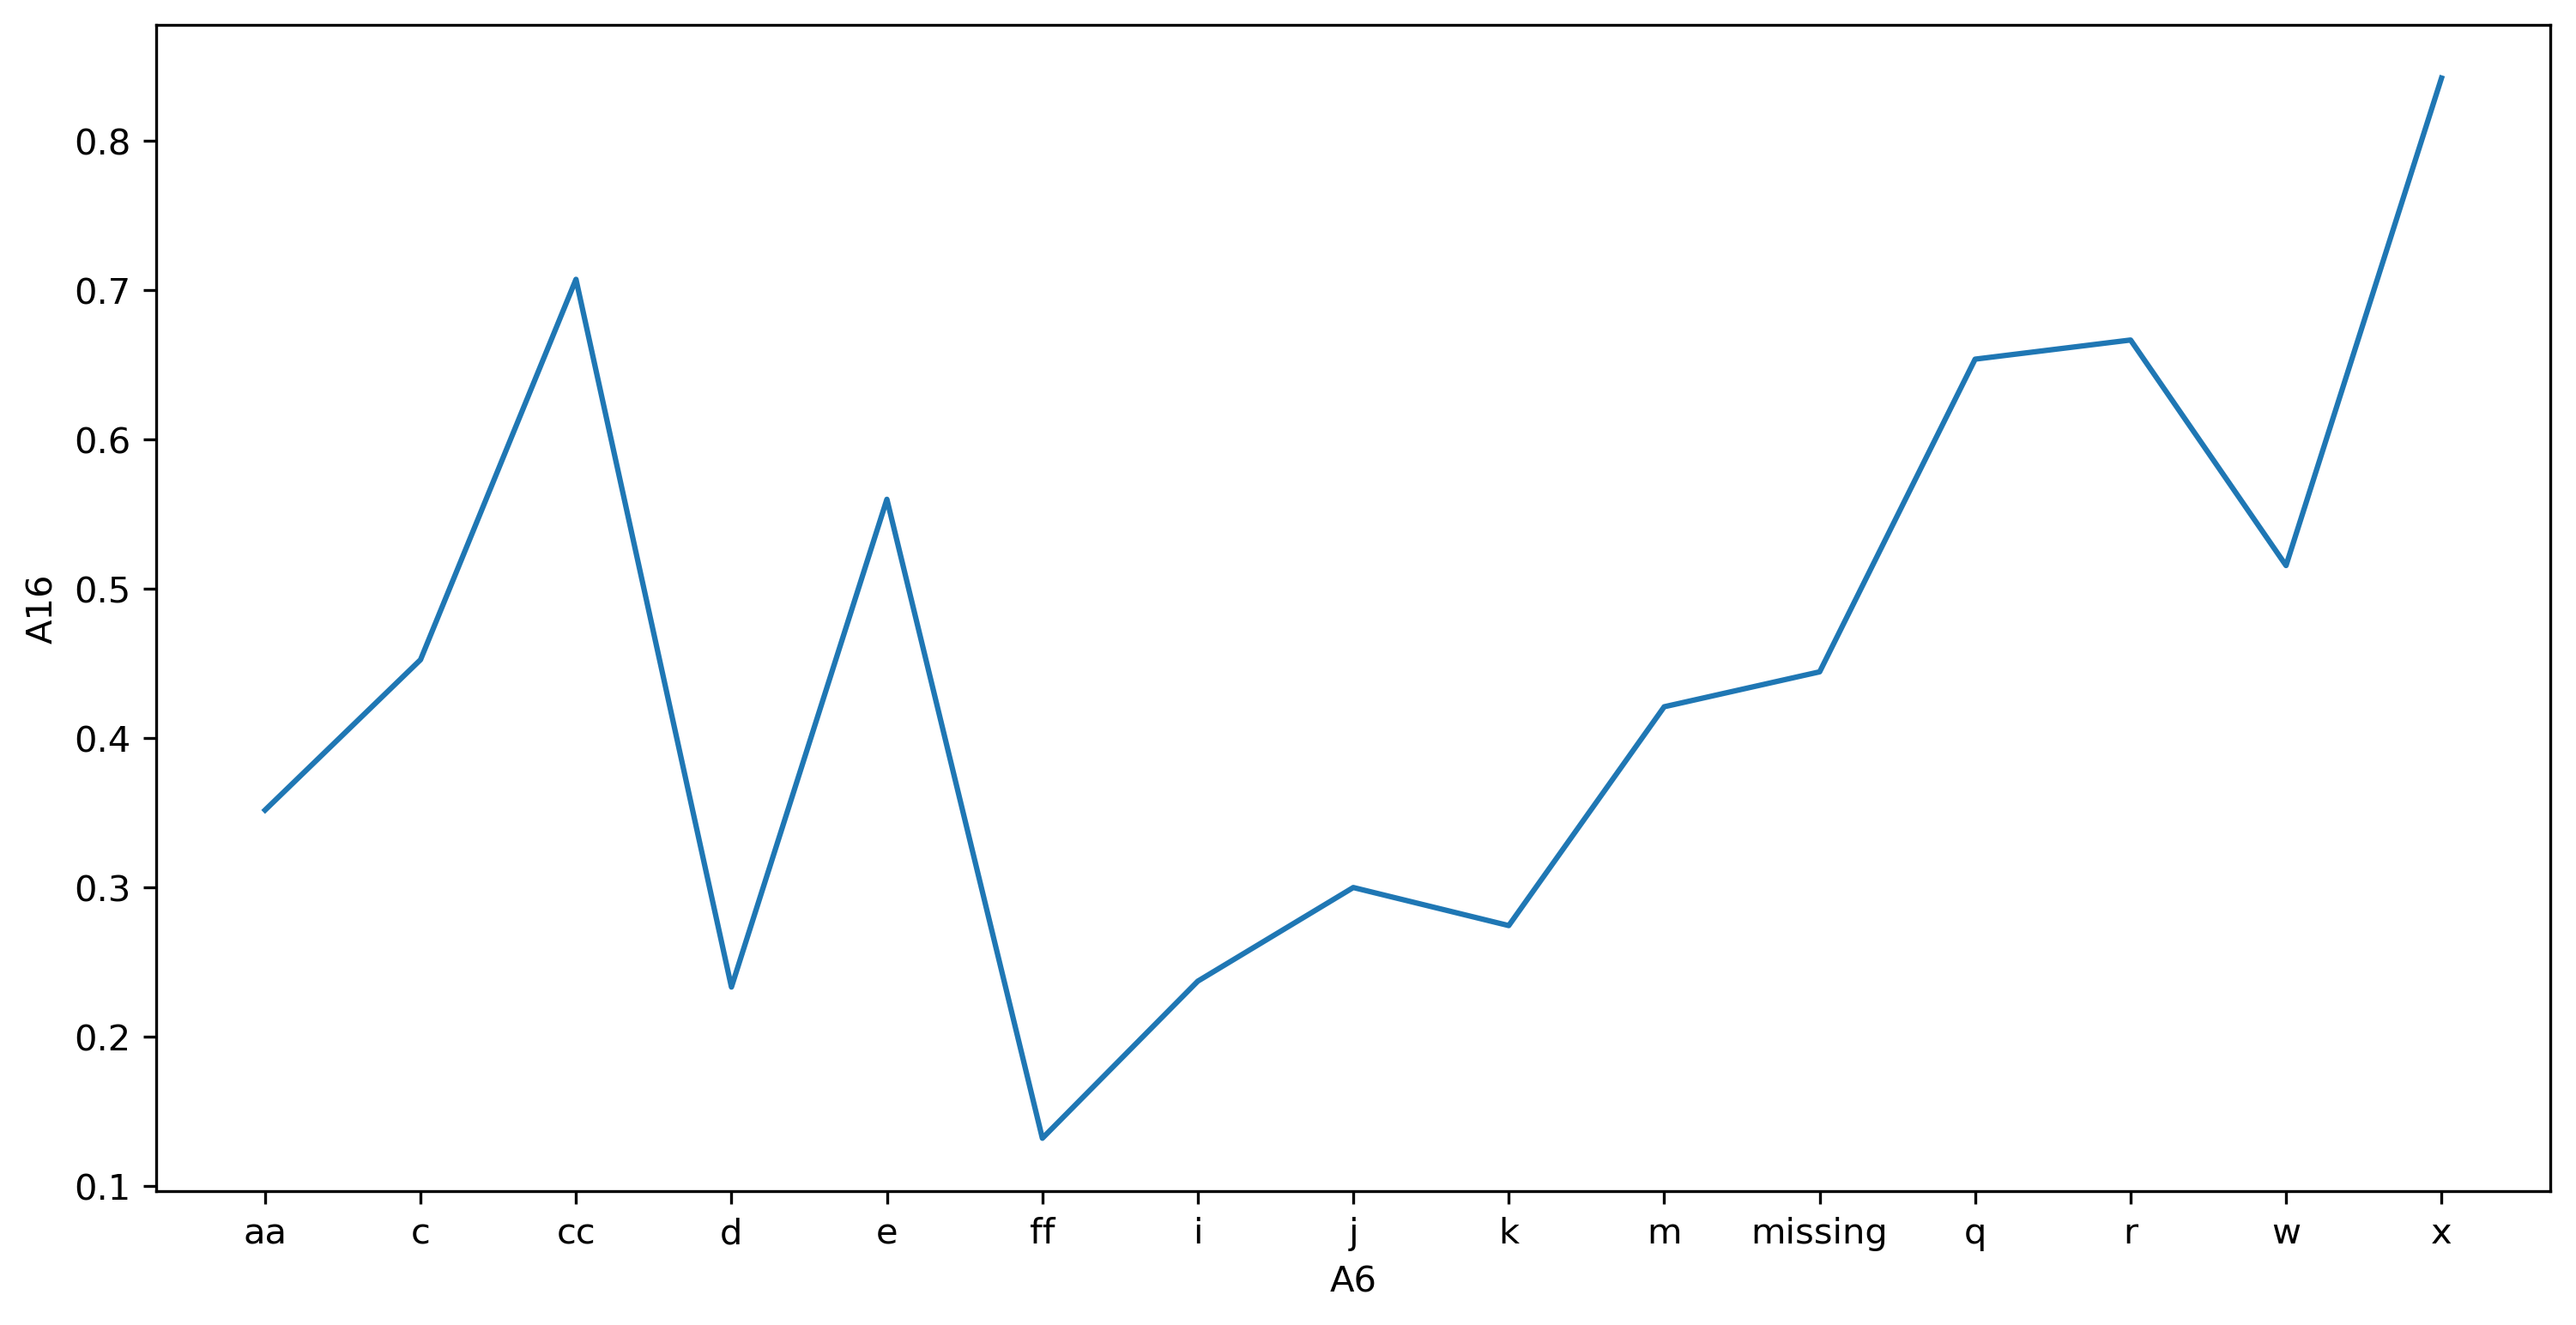

In [46]:
rel_ = categorical_feature[['A6','A16']].groupby(by='A6')[['A16']].mean().reset_index()
plt.figure(figsize=[12,6],dpi=300)
sns.lineplot(x=rel_['A6'],y=rel_['A16'])
plt.show()

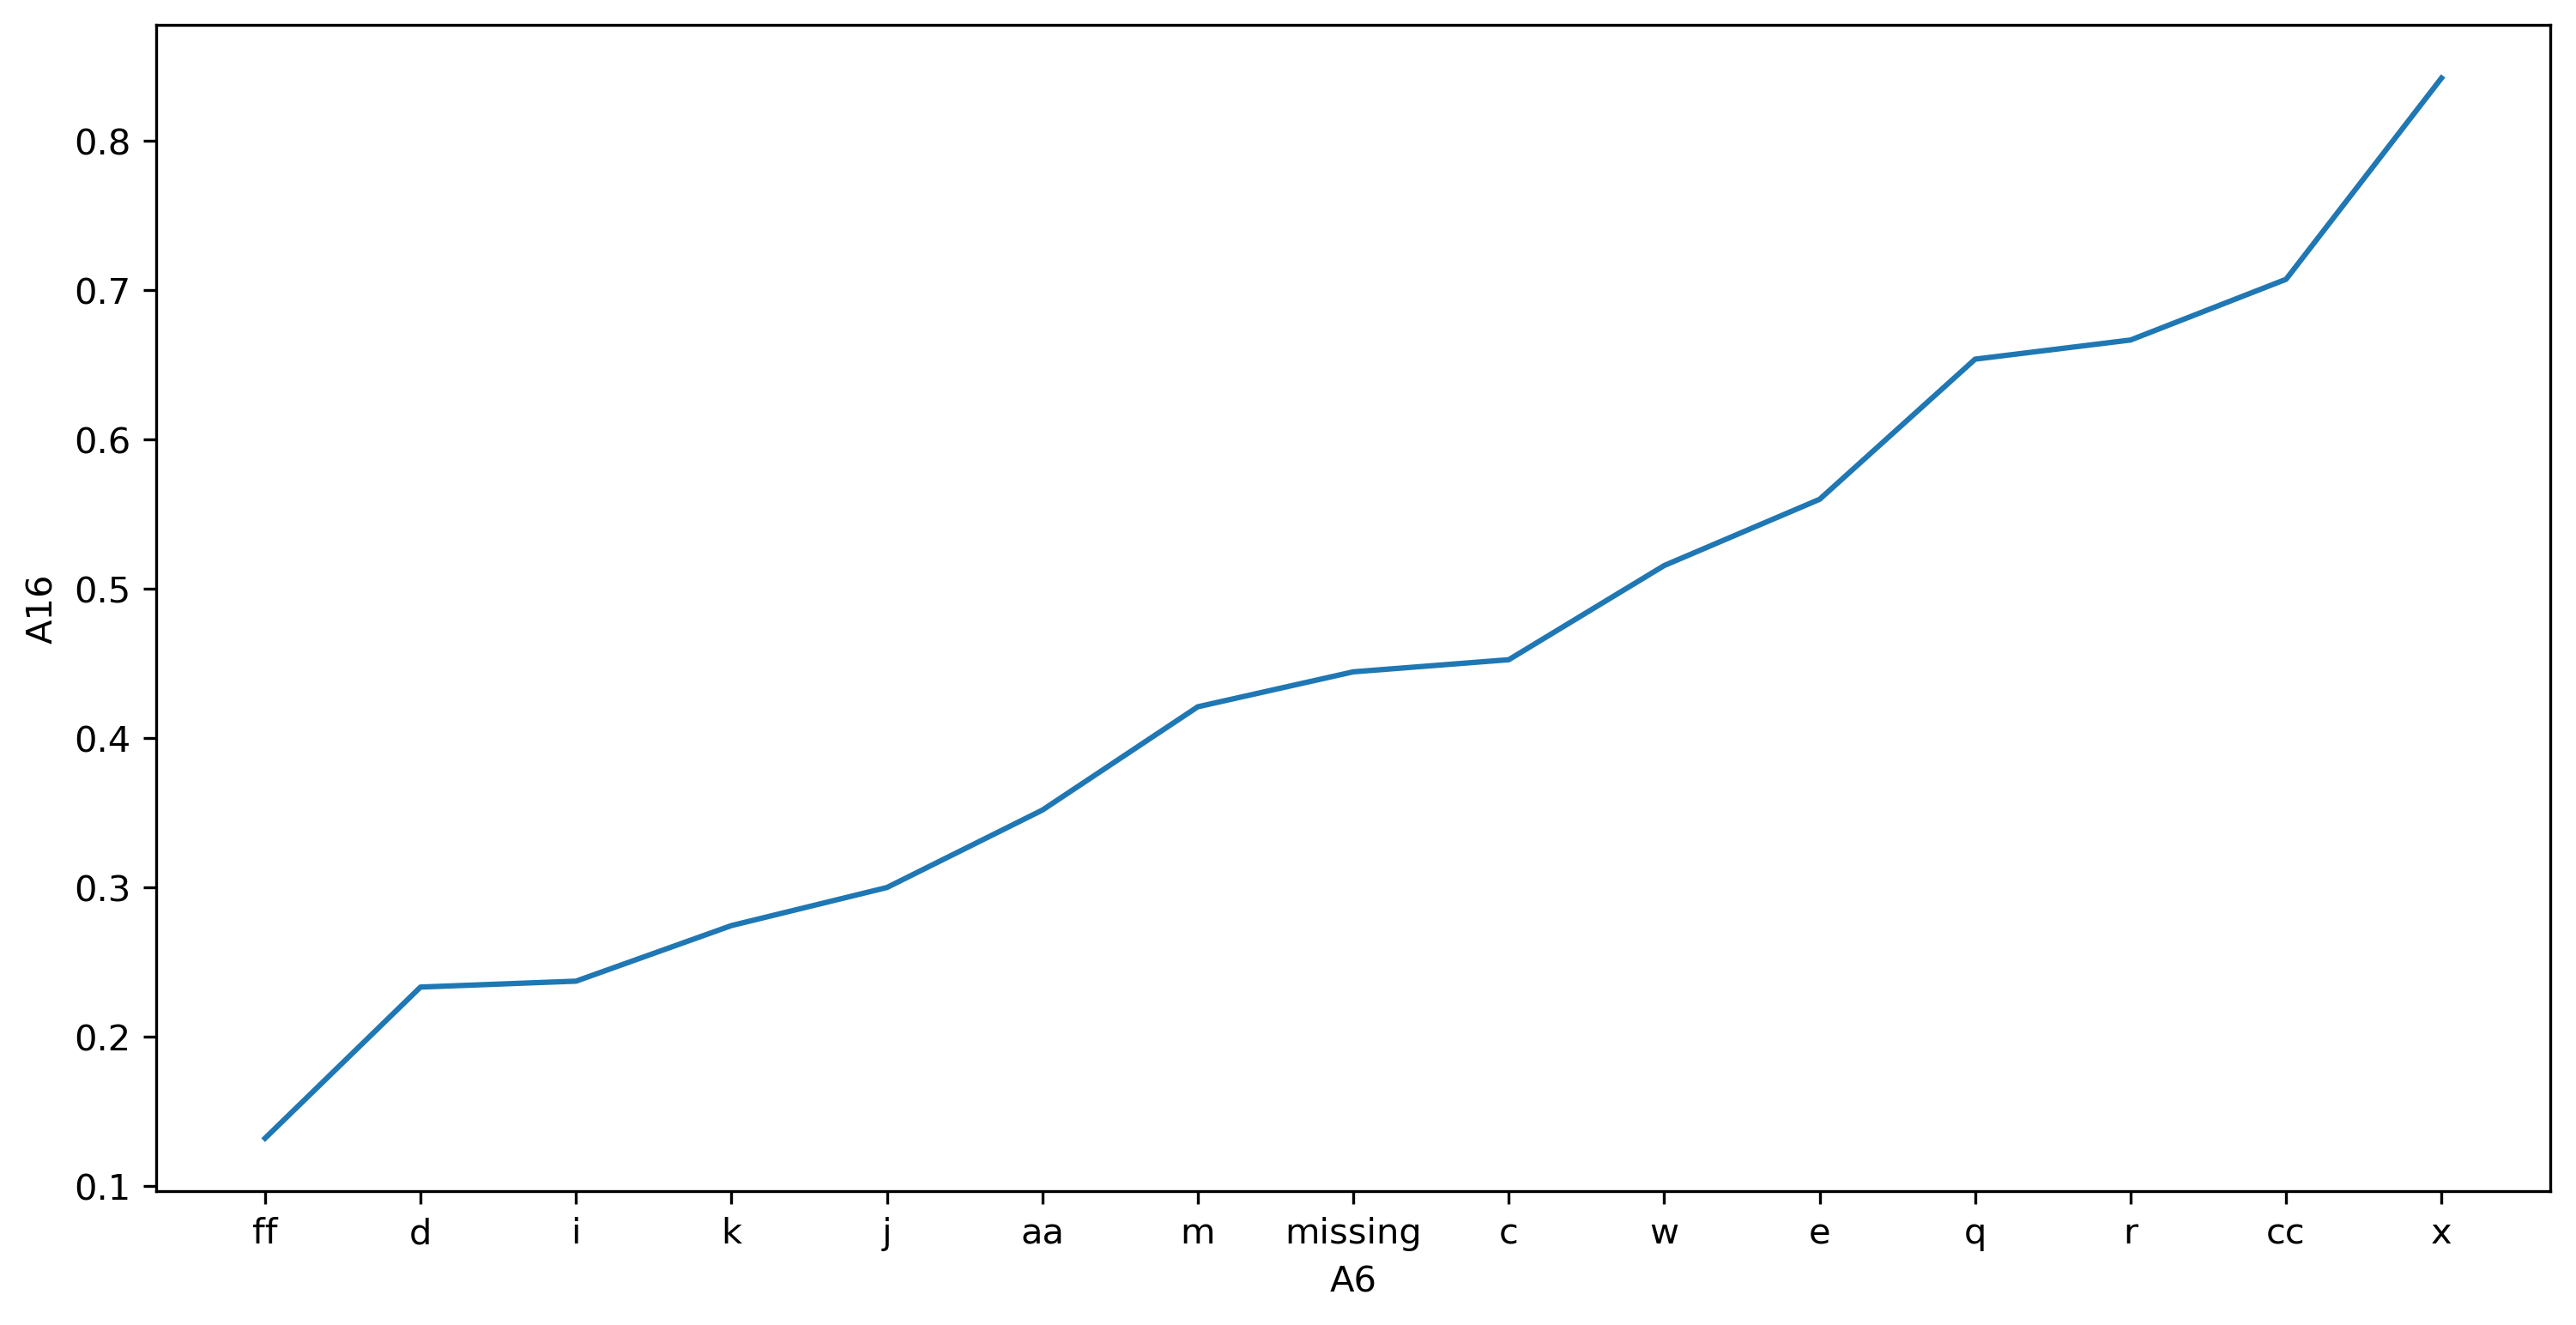

In [47]:
rel_ = categorical_feature[['A6','A16']].groupby(by='A6')[['A16']].mean().reset_index().sort_values(by='A16')
plt.figure(figsize=[12,6],dpi=300)
sns.lineplot(x=rel_['A6'],y=rel_['A16'])
plt.show()

In [48]:
encoder = {k:i for i,k in enumerate(rel_['A6'],0)}
encoder

{'ff': 0,
 'd': 1,
 'i': 2,
 'k': 3,
 'j': 4,
 'aa': 5,
 'm': 6,
 'missing': 7,
 'c': 8,
 'w': 9,
 'e': 10,
 'q': 11,
 'r': 12,
 'cc': 13,
 'x': 14}

In [49]:
categorical_feature['A6'].map(encoder)

0       9
1      11
2      11
3       9
4       9
       ..
685    10
686     8
687     0
688     5
689     8
Name: A6, Length: 690, dtype: int64

In [50]:
encoder = OrdinalEncoder(variables=['A6'])
encoder.fit(X=categorical_feature,y=categorical_feature['A16'])
encoder.encoder_dict_

{'A6': {'ff': 0,
  'd': 1,
  'i': 2,
  'k': 3,
  'j': 4,
  'aa': 5,
  'm': 6,
  'missing': 7,
  'c': 8,
  'w': 9,
  'e': 10,
  'q': 11,
  'r': 12,
  'cc': 13,
  'x': 14}}

In [51]:
encoder.transform(categorical_feature)

,A1,A4,A5,A6,A7,A9,A10,A12,A13,A16
0,b,u,g,9,v,t,t,f,g,1
1,a,u,g,11,h,t,t,f,g,1
2,a,u,g,11,h,t,f,f,g,1
3,b,u,g,9,v,t,t,t,g,1
4,b,u,g,9,v,t,f,f,s,1
...,...,...,...,...,...,...,...,...,...,...
685,b,y,p,10,h,f,f,f,g,0
686,a,u,g,8,v,f,t,t,g,0
687,a,y,p,0,ff,f,t,t,g,0
688,b,u,g,5,v,f,f,f,g,0


## Encoding with the mean of the target

Mean encoding or target encoding implies replacing the categories with the average target value for that category.

In [52]:
categorical_feature.groupby(by='A6')['A16'].mean()

A6
aa         0.351852
c          0.452555
cc         0.707317
d          0.233333
e          0.560000
ff         0.132075
i          0.237288
j          0.300000
k          0.274510
m          0.421053
missing    0.444444
q          0.653846
r          0.666667
w          0.515625
x          0.842105
Name: A16, dtype: float64

In [53]:
encoder = MeanEncoder(variables=['A6'])
encoder.fit(X=categorical_feature,y=categorical_feature['A16'])
encoder.encoder_dict_

{'A6': {'aa': 0.35185185185185186,
  'c': 0.45255474452554745,
  'cc': 0.7073170731707317,
  'd': 0.23333333333333334,
  'e': 0.56,
  'ff': 0.1320754716981132,
  'i': 0.23728813559322035,
  'j': 0.3,
  'k': 0.27450980392156865,
  'm': 0.42105263157894735,
  'missing': 0.4444444444444444,
  'q': 0.6538461538461539,
  'r': 0.6666666666666666,
  'w': 0.515625,
  'x': 0.8421052631578947}}

In [54]:
encoder.transform(categorical_feature)

,A1,A4,A5,A6,A7,A9,A10,A12,A13,A16
0,b,u,g,0.515625,v,t,t,f,g,1
1,a,u,g,0.653846,h,t,t,f,g,1
2,a,u,g,0.653846,h,t,f,f,g,1
3,b,u,g,0.515625,v,t,t,t,g,1
4,b,u,g,0.515625,v,t,f,f,s,1
...,...,...,...,...,...,...,...,...,...,...
685,b,y,p,0.560000,h,f,f,f,g,0
686,a,u,g,0.452555,v,f,t,t,g,0
687,a,y,p,0.132075,ff,f,t,t,g,0
688,b,u,g,0.351852,v,f,f,f,g,0


## Encoding with the Weight of Evidence

In [56]:
p1 = categorical_feature.groupby(by=['A6'])['A16'].mean()
p0 = 1 - p1
WoE = np.log(p1/p0)
WoE

A6
aa        -0.610909
c         -0.190354
cc         0.882389
d         -1.189584
e          0.241162
ff        -1.882731
i         -1.167605
j         -0.847298
k         -0.971861
m         -0.318454
missing   -0.223144
q          0.635989
r          0.693147
w          0.062520
x          1.673976
Name: A16, dtype: float64

In [59]:
encoder = WoEEncoder(variables=['A6'])
encoder.fit(X=categorical_feature,y=categorical_feature['A16'])
encoder.encoder_dict_

{'A6': {'aa': -0.3897218407295244,
  'c': 0.03083351310222998,
  'cc': 1.1035764217919226,
  'd': -0.9683968252803875,
  'e': 0.4623492984103369,
  'ff': -1.6615440058403328,
  'i': -0.9464179185616124,
  'j': -0.626110618793755,
  'k': -0.750673341435517,
  'm': -0.09726648952508576,
  'missing': -0.001956309720760831,
  'q': 0.8571760083134454,
  'r': 0.9143344221533942,
  'w': 0.28370759857478284,
  'x': 1.8951636751651206}}

In [60]:
encoder.transform(categorical_feature)

,A1,A4,A5,A6,A7,A9,A10,A12,A13,A16
0,b,u,g,0.283708,v,t,t,f,g,1
1,a,u,g,0.857176,h,t,t,f,g,1
2,a,u,g,0.857176,h,t,f,f,g,1
3,b,u,g,0.283708,v,t,t,t,g,1
4,b,u,g,0.283708,v,t,f,f,s,1
...,...,...,...,...,...,...,...,...,...,...
685,b,y,p,0.462349,h,f,f,f,g,0
686,a,u,g,0.030834,v,f,t,t,g,0
687,a,y,p,-1.661544,ff,f,t,t,g,0
688,b,u,g,-0.389722,v,f,f,f,g,0
